In [1]:
import pandas as pd
import numpy as np


import visualize as vs

In [2]:
def load_train_data(data_path):
    train = pd.read_csv(data_path)
    return train

In [3]:
def prepare_train_data(data_path):
    train = load_train_data(data_path)
    target = train.actual_delivery_time
    #train.drop(['actual_delivery_time'], axis=1, inplace=True)
    return train, target

In [4]:
train, target = prepare_train_data("../doordash_data/historical_data.csv")
train.head(n=10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
import datetime
create_time = pd.to_datetime(train['created_at'])
delivery_time = pd.to_datetime(train['actual_delivery_time'])
expected_time_arrival = delivery_time - create_time
train['ETA'] = expected_time_arrival / np.timedelta64(1, 's')

train['ordered_at_store'] = create_time + pd.to_timedelta(train['estimated_order_place_duration'], unit='s')
train['ordered_hour'] = train['ordered_at_store'].dt.hour
train['Cooking Time'] = train['ETA'] - train['estimated_order_place_duration'] - train['estimated_store_to_consumer_driving_duration']
train.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,ETA,ordered_at_store,ordered_hour,Cooking Time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015-02-06 22:31:43,22,2472.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015-02-10 21:56:51,21,2888.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015-01-22 20:46:54,20,645.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015-02-03 21:29:11,21,2340.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015-02-15 02:48:02,2,1294.0


[ 1.  2.  3.  4. nan  5.  6.]
7


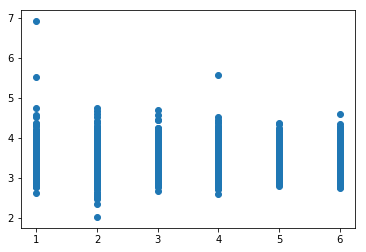

In [6]:
import matplotlib.pyplot as plt

uniq_stores = train.market_id.unique()
print(uniq_stores)
print(len(uniq_stores))
plt.scatter(train['market_id'], np.log10(train['ETA']))
plt.show()

[ 1.  2.  3.  4. nan  5.  6.  7.]


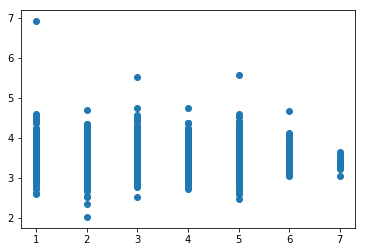

In [7]:
uniq_protocols = train.order_protocol.unique()
print(uniq_protocols)
plt.scatter(train['order_protocol'], np.log10(train['ETA']))
plt.show()

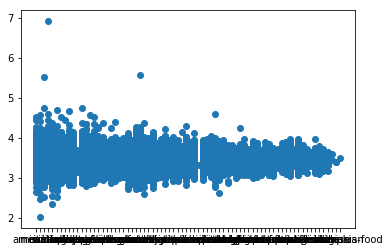

In [8]:
primary_store_df = train[train.store_primary_category.notnull()]
plt.scatter(primary_store_df['store_primary_category'], np.log10(primary_store_df['ETA']))
plt.show()

[  4   1   6   3   2   5   7   8  10   9  13  16  12  25  17  11  24  30
  14  31  35  40  26  28  21  20  15  19  18  23  29  34  42  22  56  36
  57  39  47  45  38  33  27  41 411  32  50  59  51  37  48  44  49  43
  84  64  66]


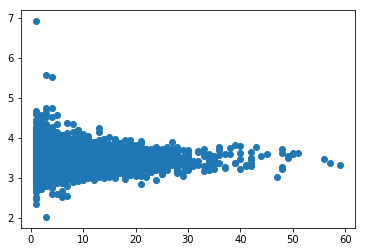

In [9]:
uniq_items = train.total_items.unique()
print(uniq_items)
train = train[train['total_items'] < 60]
plt.scatter(train['total_items'], np.log10(train['ETA']))
plt.show()

[ 33.   1.   6.   2.  10.   7.   8.   3.  16.   5.   4.  24.  12.  19.
  21.  22.  27.  13.  18. 117. 130. 121.  94.  34.  17.  38.  20.  15.
  39.  26.  30.  35.  11.  14.  32.  29.  25.  23.  61.  41.  58.  51.
  57.  60.   9. 108.  72.  89. 112.  55. 126.  80.  69. 125. 113. 105.
  98.  86.  90.  87.  74.  84.  91.  96. 123. 101. 119.  nan 129.  66.
  81.  36.  75.  43.  70.  65.  77. 114.  62. 116. 102.  76.  67.  64.
  88.  73.  63.  46.  28.  47. 110.  97.  42.  79.  49.  50.  37.  92.
 103.  44.  68.  56.   0. 107.  78.  71. 128. 104.  45.  31. 100.  40.
  53. 115. 109.  99.  85.  59. 118.  54.  52.  48. 132. 127. 133. 131.
 149.  93. 111.  95.  82. 136. 120. 134. 124. 106. 137.  83. 152. 147.
 144. 150. 145. 122. 155. 135. 151. 140. 141. 143. 138. 139. 156. 146.
  -2. 160. 158. 154. 153. 148. 142. 157. 171.  -1.  -3. 162. 165. 163.
 164. 159. 169.  -4. 168.]


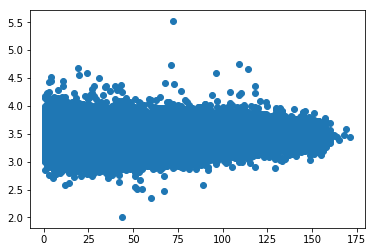

In [10]:
uniq_onshift_dashers = train.total_onshift_dashers.unique()
print(uniq_onshift_dashers)
train = train[train['total_onshift_dashers'] > 0]
plt.scatter(train['total_onshift_dashers'], np.log10(train['ETA']))
plt.show()

[22 21 20  2  3  0  1 19  4 23  5 18  6  7 17 16 15 14]


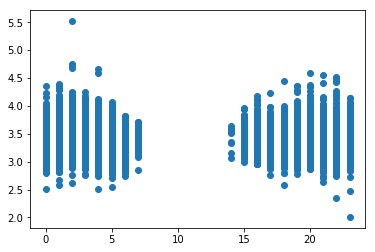

In [11]:
uniq_ordered_hour = train.ordered_hour.unique()
print(uniq_ordered_hour)
plt.scatter(train['ordered_hour'], np.log10(train['ETA']))
plt.show()

[ 21.   2.   0.   9.   7.  18.   1.   4.   3.   8.  12.  26.  11.  30.
  16.  39.  24.  27.  20.  13. 178. 230. 205. 149.  28.  15.  42.  43.
  33.   5.  37.  46.  36.  14.  29.  32.  72.  41.  54.  49.  23.  56.
  60.  10.   6. 154. 144.  34. 100. 173.  80. 202. 124. 130. 181. 188.
 148. 150. 127. 160. 107. 123. 159. 186. 143. 190. 171. 261. 132.  67.
 120. 158.  59.  38.  47.  68.  92.  99. 175. 102. 184. 121.  17.  96.
 111.  22. 131. 141.  89.  48.  65. 194.  73.  45. 203. 134. 126. 183.
  64. 167.  31. 153. 119.  75.  95.  52. 118. 191.  61. 106.  19.  58.
 152. 101.  35. 151.  83. 179.  97.  44.  25. 147. 169. 135. 142. 165.
 172.  91.  40. 237. 198. 220. 219.  78.  90. 138. 168.  85.  81. 212.
 192. 137. 189.  51.  74.  62.  63.  50. 122.  93.  66. 207. 113. 114.
  69.  57.  86.  71.  79.  87.  88.  70.  84. 108.  76.  53.  55.  82.
 110.  98. 185. 225. 104. 145. 247. 232.  77. 133. 103. 174. 164. 193.
 208. 231. 163.  94. 146. 115. 129. 112. 136. 162. 176. 246. 199. 116.
 109. 

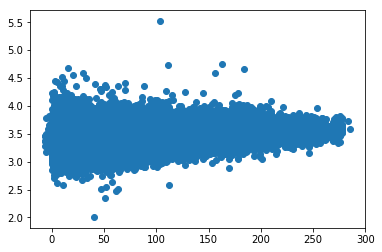

In [12]:
uniq_outstanding_orders = train.total_outstanding_orders.unique()
print(uniq_outstanding_orders)
plt.scatter(train['total_outstanding_orders'], np.log10(train['ETA']))
plt.show()

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


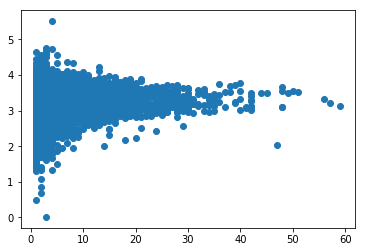

In [13]:
plt.scatter(train['total_items'], np.log10(train['Cooking Time']))
plt.show()

In [14]:
min_delivery_time = np.min(train['ETA'])
print("Mininum delivery time: {}".format(min_delivery_time))
max_delivery_time = np.max(train['ETA'])
print("Maximum delivery time: {}".format(max_delivery_time))
mean_delivery_time = np.mean(train['ETA'])
print("Mean delivery time: {}".format(mean_delivery_time))
median_delivery_time = np.median(train['ETA'])
print("Median delivery time: {}".format(median_delivery_time))
std_delivery_time = np.std(train['ETA'])
print("SD of delivery time: {}".format(std_delivery_time))

Mininum delivery time: 101.0
Maximum delivery time: 332482.0
Mean delivery time: 2854.068741550248
Median delivery time: nan
SD of delivery time: 1394.2525604137493


In [15]:
train.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'ETA',
       'ordered_at_store', 'ordered_hour', 'Cooking Time'],
      dtype='object')

In [16]:
features = ['total_items', 'total_onshift_dashers',
            'total_busy_dashers', 'total_outstanding_orders',
            'ordered_hour', 'total_items', 'num_distinct_items']

scaled_features = ['total_items', 'total_onshift_dashers',
                   'total_busy_dashers', 'total_outstanding_orders',
                   'ordered_hour', 'subtotal', 'min_item_price', 'max_item_price',
                  'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

train = train[~train.isin([np.nan, 'NaN', np.inf, -np.inf]).any(1)]
ETA = np.log10(train['ETA'])

from sklearn.preprocessing import StandardScaler

scaled_data = train[scaled_features]
feature_data = pd.DataFrame(StandardScaler().fit_transform(scaled_data),
                                columns=scaled_features)
feature_data.head()

,total_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,ordered_hour,subtotal,min_item_price,max_item_price,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,0.322969,-0.374755,-0.899738,-0.730631,1.564514,0.405067,-0.248144,0.136929,1.547352,1.440842
1,-0.886616,-1.308127,-1.275594,-1.091841,1.448892,-0.437729,1.372929,0.424099,1.547352,0.658473
2,0.322969,-1.103952,-1.150309,-0.787664,-0.979159,1.132464,0.257600,0.787965,1.547352,-1.176205
3,-0.886616,-1.191456,-1.150309,-0.977774,-0.632295,-0.642822,1.613302,0.647056,1.547352,1.138875
4,-0.483421,-1.191456,-1.181630,-0.996786,-0.747916,0.502965,1.421004,1.842109,1.547352,-1.560526


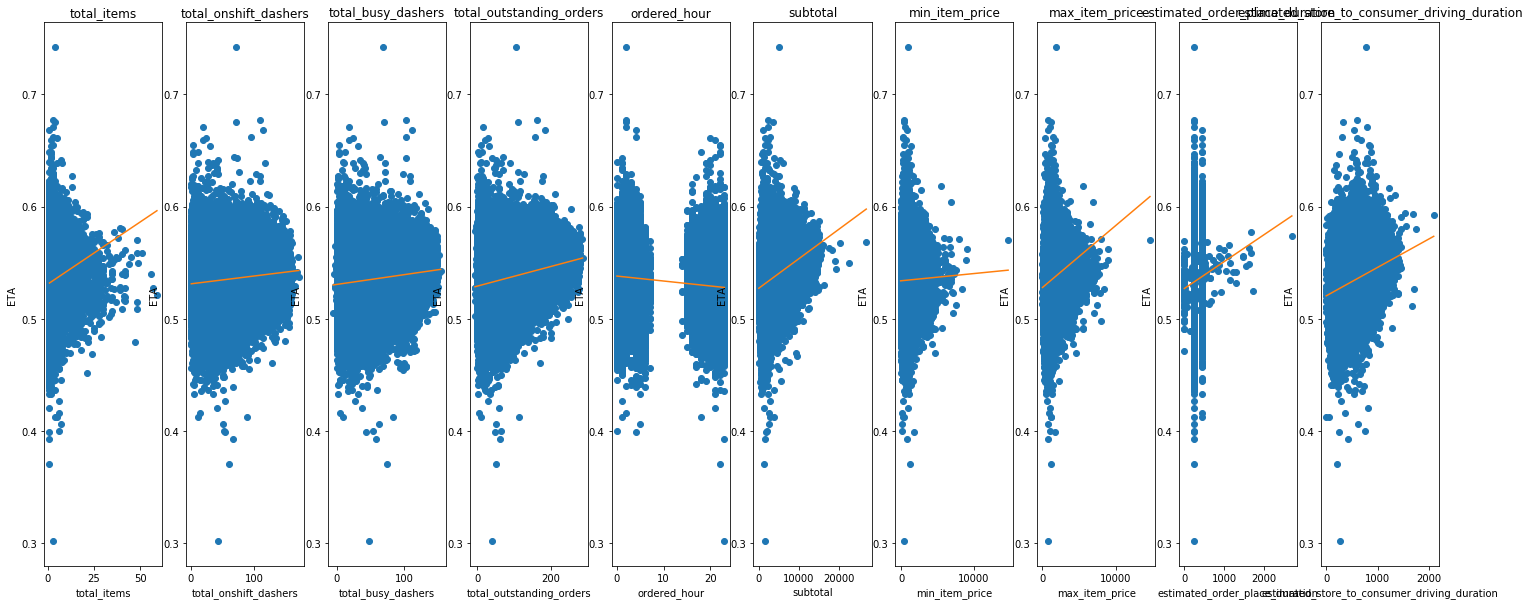

In [17]:
vs.plotWithRegressionLine(feature_data, np.log10(ETA), 'ETA', train)

In [18]:
from scipy.stats import pearsonr

total_items = train['total_items'][train.total_items.notnull()]
print(total_items)
total_onshift_dashers = train.total_onshift_dashers


corr, _ = pearsonr(total_items, ETA)
print('Correlation for total items: %.3f' % corr)

total_onshift_dashers = train.total_onshift_dashers
corr, _ = pearsonr(total_onshift_dashers, total_items)
print('Correlation for total items: %.3f' % corr)

0         4
1         1
8         4
14        1
15        2
         ..
197423    3
197424    6
197425    5
197426    1
197427    4
Name: total_items, Length: 172212, dtype: int64
Correlation for total items: 0.138
Correlation for total items: 0.038


In [19]:
from scipy.stats import spearmanr

corr, _ = spearmanr(total_items, ETA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.159


In [20]:
print(feature_data.corrwith(ETA))

total_items                                    -0.003267
total_onshift_dashers                          -0.001850
total_busy_dashers                             -0.001414
total_outstanding_orders                        0.000022
ordered_hour                                    0.004693
subtotal                                       -0.000960
min_item_price                                 -0.000690
max_item_price                                  0.001848
estimated_order_place_duration                 -0.003702
estimated_store_to_consumer_driving_duration   -0.004113
dtype: float64


In [21]:
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(feature_data, ETA, test_size=0.30, random_state=45)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.

/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dongkim/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.

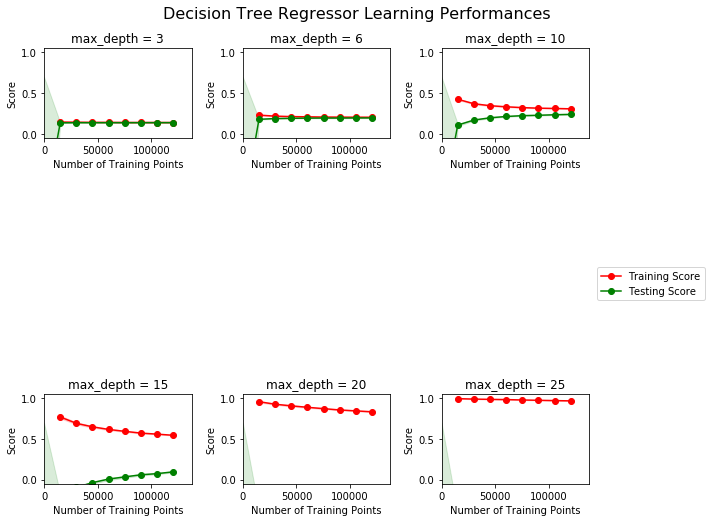

In [22]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(feature_data, ETA)

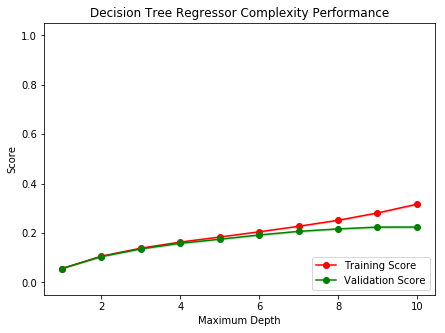

In [23]:
vs.ModelComplexity(X_train, y_train)

In [24]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [64]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve, validation_curve


def fit_model(X, y, iteration=10, random_seed=0):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = iteration, test_size = 0.20, random_state = random_seed)

    # TODO: Create a decision tree regressor object
    #regressor = DecisionTreeRegressor(random_state=random_seed)
    regressor = RandomForestRegressor(random_state=random_seed)
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [x + 10 for x in range(20)],
              'n_estimators': [x for x in range(5, 50, 5)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(score_func=performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train[: int(len(X_train)*0.3)], y_train[: int(len(X_train)*0.3)])

# Produce the value for 'max_depth'
print("Parameter 'n_estimators' is {} for the optimal model.".format(reg.get_params()['n_estimators']))
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

In [27]:
import csv

def load_prediction_data():
    data_dict = {}
    with open("../doordash_data/data_to_predict.json") as fh:
        for line in fh:
            row = json.loads(line)
            for feature in scaled_features:
                if feature not in data_dict:
                    data_dict[feature] = []
                    
                if feature == "ordered_hour":
                    ordered_at_store = pd.to_datetime(row['created_at'], unit='s') + pd.to_datetime(row['estimated_order_place_duration'], unit='s')
                    data_dict[feature] = ordered_at_store.dt.hour

                data_dict[feature] = row[feature]
                
load_prediction_data()

NameError: name 'json' is not defined

In [63]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
differences = []
EXPECTED_TIME = []
ACTUAL_TIME = []
for i, (ata, eta) in enumerate(zip(reg.predict(X_test), y_test)):
    expected_time = 10**eta
    actual_time = 10**ata
    EXPECTED_TIME.append(expected_time)
    ACTUAL_TIME.append(actual_time)
    differences.append(expected_time - actual_time)
    #print("ETA: {:.0f} PTA: {:.0f}".format(expected_time, actual_time))
    
    
print("Average delay: {:.0f}".format(np.mean(differences)))
print("Median delay: {:.0f}".format(np.median(differences)))
print("Maxinum delay: {:.0f}".format(np.min(differences)))
print("Minimum delay: {:.0f}".format(np.max(differences)))

print("Max of ETA: {:.0f}".format(np.max(EXPECTED_TIME)))
print("Min of ETA: {:.0f}".format(np.min(EXPECTED_TIME)))
print("Max of ATA: {:.0f}".format(np.max(ACTUAL_TIME)))
print("Min of ATA: {:.0f}".format(np.min(ACTUAL_TIME)))

Average delay: 134
Median delay: -39
Maxinum delay: -4637
Minimum delay: 45235
Max of ETA: 48178
Min of ETA: 297
Max of ATA: 7776
Min of ATA: 1185


In [ ]:
np_eta = np.array(EXPECTED_TIME)
np_ata = np.array(ACTUAL_TIME)
bins = [3600*x for x in range(24)]
plt.hist(np_eta, bins)
plt.show()

In [ ]:
np_ata = np.array(ACTUAL_TIME)
plt.hist(np_ata, bins)
plt.show()